In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract opencv-python-headless

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

In [62]:
from google.colab import files
uploaded = files.upload()

Saving License_Photo1.jpg to License_Photo1 (3).jpg


In [63]:
image_path = next(iter(uploaded))
img = cv2.imread(image_path)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)  # smooth while preserving edges
edged = cv2.Canny(gray, 170, 200)  # edge detection

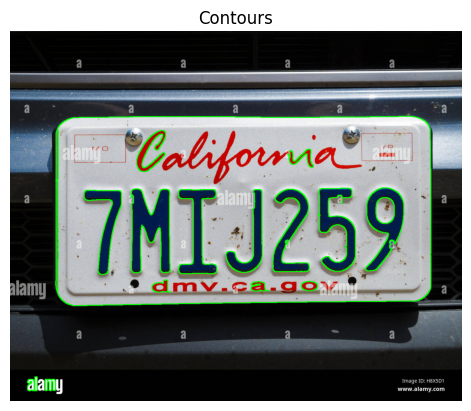

In [64]:
cnts, _ = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

plate_img = None
found = False
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
    if len(approx) == 4:
        x, y, w, h = cv2.boundingRect(approx)
        plate_img = img[y:y+h, x:x+w]
        found = True
        break

if not found:
    print("❌ Plate region not found. Try another image or adjust preprocessing.")

if plate_img is not None:
    # Draw all candidate contours
    img_copy = img.copy()
    cv2.drawContours(img_copy, cnts, -1, (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    plt.title("Contours")
    plt.axis('off')
    plt.show()
else:
    print("License plate region not found.")

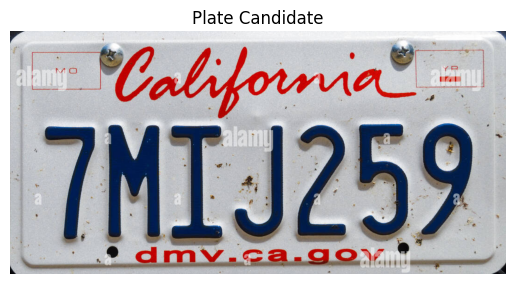

[PSM 6] OCR Result: 7NTJ259
[PSM 8] OCR Result: 1MTJ259
[PSM 11] OCR Result: CFE6MTMIS259


In [65]:
plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
plt.title("Plate Candidate")
plt.axis('off')
plt.show()

# OCR with multiple psm values
for psm in [6, 8, 11]:
    config = f'--oem 3 --psm {psm} -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
    text = pytesseract.image_to_string(plate_img, config=config)
    print(f"[PSM {psm}] OCR Result:", re.sub(r'[^A-Z0-9]', '', text))

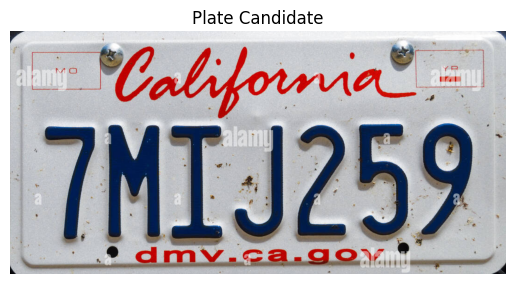

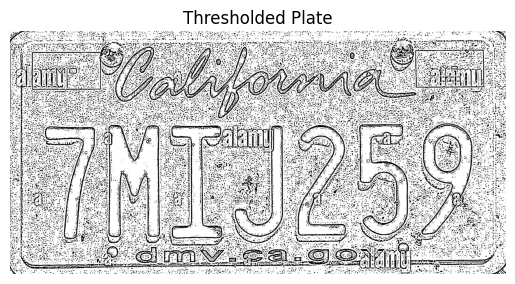

📄 License Plate: 


In [66]:
import re

# Step 1: Display the cropped plate image
plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
plt.title("Plate Candidate")
plt.axis('off')
plt.show()

# Step 2: Resize the plate for better OCR accuracy
plate_resized = cv2.resize(plate_img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# Step 3: Convert to grayscale and apply blur + adaptive thresholding
gray = cv2.cvtColor(plate_resized, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3, 3), 0)
thresh = cv2.adaptiveThreshold(
    blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# Step 4: Display the processed threshold image (optional debug)
plt.imshow(thresh, cmap='gray')
plt.title("Thresholded Plate")
plt.axis('off')
plt.show()

# Step 5: OCR with best config
config = '--oem 3 --psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
text = pytesseract.image_to_string(thresh, config=config)

# Step 6: Clean the output to remove non-alphanumeric characters
clean_text = re.sub(r'[^A-Z0-9]', '', text)
print("📄 License Plate:", clean_text)

In [52]:
if plate_img is not None:
    gray_plate = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(gray_plate, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 11, 2)

    custom_config = r'--oem 3 --psm 8 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
    text = pytesseract.image_to_string(thresh, config=custom_config)

    import re
    clean_text = re.sub(r'[^A-Z0-9]', '', text)
    print("License Plate:", clean_text)

License Plate: 
